##  IMDB 영화 리뷰

이 코드는 IMDB 영화 리뷰 데이터셋을 로드하고, 각 리뷰를 500 단어로 패딩한 후, 1D CNN을 사용하여 리뷰가 긍정적인지 부정적인지 분류합니다. 'Embedding' 레이어는 각 단어를 50차원의 벡터로 임베딩하고, 'Conv1D' 레이어는 임베딩된 단어 벡터들에 대해 1차원 합성곱을 수행합니다. 그 다음, 'GlobalMaxPooling1D' 레이어는 각 필터의 최대값을 추출하여 고정된 크기의 벡터를 생성합니다. 마지막으로, 'Dense' 레이어를 사용하여 분류를 수행합니다.

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2
리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


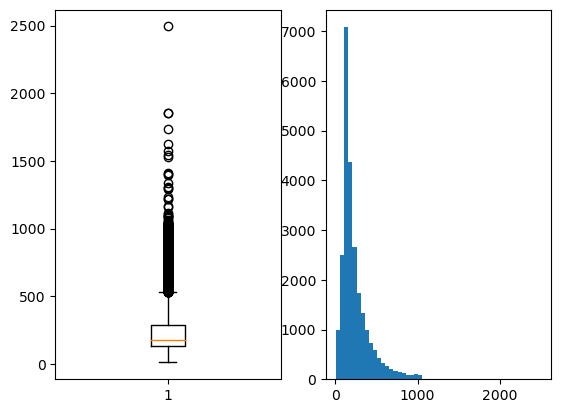

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D
import matplotlib.pyplot as plt

# 단어 사전의 크기 (10,000개의 단어)
vocabulary_size = 10000

# 최대 문장 길이 (각 문장의 단어 수)
max_len = 500

# IMDB 영화 리뷰 데이터 로드
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()





### 문장 패딩(Padding):
sequence.pad_sequences 함수는 문장(즉, 단어의 시퀀스)의 길이를 동일하게 맞추는 역할을 합니다. 이는 모든 입력 피쳐가 동일한 길이를 가져야하는 신경망 모델에 필요한 전처리 과정입니다. maxlen 인자에 지정된 길이보다 긴 문장은 잘라내고, 짧은 문장은 0으로 채워서 길이를 맞춥니다.

### Embedding 레이어:
Embedding 레이어는 각 단어를 고차원의 실수 벡터로 변환하는 역할을 합니다. 이렇게 변환된 벡터는 단어 간의 유사도를 계산하는 데 사용되며, 단어 간의 문맥을 학습하는 데 도움이 됩니다. 여기서는 단어의 임베딩 크기를 50으로 설정하였습니다.

### Conv1D 레이어:
Conv1D 레이어는 1차원 컨볼루션 레이어로, 임베딩된 단어 벡터의 문맥 정보를 학습하는 데 사용됩니다. 컨볼루션 레이어는 일련의 필터를 사용하여 입력 데이터의 특징을 학습하며, 이러한 특징은 문장을 분류하는 데 중요한 정보를 제공합니다.

### GlobalMaxPooling1D 레이어:
GlobalMaxPooling1D 레이어는 각 피쳐 맵(feature map)에서 가장 큰 값을 취하는 역할을 합니다. 이 레이어를 통해 컨볼루션 레이어의 출력 크기를 줄이고, 가장 중요한 피쳐만을 추출할 수 있습니다.

### Dense 레이어:
Dense 레이어는 전결합층(fully-connected layer)으로, 각 뉴런이 이전 레이어의 모든 뉴런과 연결되어 있습니다. 마지막 Dense 레이어에서는 sigmoid 활성화 함수를 사용하여 최종 출력을 0과 1 사이의 값으로 변환합니다. 이 값은 이진 분류 문제에서 각 클래스에 속할 확률을 나타냅니다.

### 모델 컴파일:
마지막으로 compile 함수를 사용하여 모델을 컴파일합니다. 여기서는 adam 최적화 알고리즘을 사용하고, 손실 함수로는 binary_crossentropy를 사용합니다. binary_crossentropy는 이진 분류 문제에서 주로 사용되는 손실 함수입니다. 또한, 학습 도중에 정확도를 기록하기 위해 accuracy 지표를 사용합니다.

In [4]:
# 문장(즉, 단어의 시퀀스)의 길이를 동일하게 맞추는 역할
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
print(len(X_train[0]))

# 모델 구성
model = Sequential()
model.add(Embedding(vocabulary_size, 50, input_length=max_len))
model.add(Conv1D(250, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


500


In [5]:
# 모델 훈련
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128)

Epoch 1/2
196/196 [==============================] - 23s 116ms/step - loss: 0.4523 - accuracy: 0.7700 - val_loss: 0.2764 - val_accuracy: 0.8846
Epoch 2/2
196/196 [==============================] - 23s 116ms/step - loss: 0.2059 - accuracy: 0.9218 - val_loss: 0.2789 - val_accuracy: 0.8850


In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
X_train[0]
y_train[:]

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

782/782 - 5s - loss: 0.2789 - accuracy: 0.8850 - 5s/epoch - 7ms/step

Test accuracy: 0.8849999904632568


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           500000    
                                                                 
 conv1d_1 (Conv1D)           (None, 498, 250)          37750     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 600751 (2.29 MB)
Trainable params: 600751 (2.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [8]:
import re

word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key
    
    
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = sequence.pad_sequences([encoded], maxlen=max_len)
  score = float(model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [9]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."
# test_input ="this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <unk> to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the <unk> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"
# test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

1/1 [==============================] - 0s 65ms/step
97.89% 확률로 부정 리뷰입니다.


C:\Users\yuko\AppData\Local\Temp\ipykernel_9244\2256009179.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_sequence)) # 예측


In [10]:
index_to_word[5]
# word_to_index['the']

'and'

## 코드 분석

### 데이터 준비:

```python
from keras.datasets import imdb
from keras.preprocessing import sequence

# 단어 사전의 크기 (10,000개의 단어)
vocabulary_size = 10000

# 최대 문장 길이 (각 문장의 단어 수)
max_len = 500

# IMDB 영화 리뷰 데이터 로드
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)

# 문장들을 같은 길이로 맞춰줍니다 (문장 패딩)

X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
```

이 부분에서는 IMDB 데이터셋을 로드하고, 리뷰를 일정한 길이로 맞추는 작업을 수행합니다. 데이터는 훈련 세트(X_train, y_train)과 테스트 세트(X_test, y_test)로 분리됩니다. 텍스트 데이터는 일반적으로 가변적인 길이를 가지기 때문에, 이를 일정한 길이로 맞추는 패딩 작업이 필요합니다.

### 모델 구성
```python
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D

model = Sequential()
model.add(Embedding(vocabulary_size, 50, input_length=max_len))
model.add(Conv1D(250, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
이 부분에서는 Keras를 사용하여 모델을 구성합니다. 먼저, Embedding 레이어를 사용하여 각 단어를 50차원의 벡터로 임베딩합니다. 그 다음, Conv1D 레이어를 사용하여 임베딩된 단어 벡터들에 대해 1차원 합성곱을 수행합니다. GlobalMaxPooling1D 레이어는 각 필터의 최대값을 추출하여 고정된 크기의 벡터를 생성합니다. 이후에는 Dense 레이어를 사용하여 분류를 수행합니다.


### 모델 훈련
```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128)

```

모델을 컴파일하고 훈련하는 단계입니다. 여기서는 'adam' 옵티마이저를 사용하고, 손실 함수로는 이진 크로스 엔트로피를 사용합니다. 그리고 'accuracy'를 측정 지표로 설정하여 모델의 성능을 평가합니다. 이후 model.fit() 함수를 사용하여 모델을 훈련시킵니다. 이 함수는 입력 데이터와 그에 상응하는 타깃 레이블을 받아서 모델을 훈련시킵니다. 'validation_data' 인수로 테스트 데이터를 전달하여 모델의 성능을 각 에포크마다 평가합니다.

총적으로, 이 코드는 텍스트 데이터를 받아서 이를 벡터로 변환한 후, 1차원 합성곱 네트워크(CNN)를 통해 텍스트를 분류하는 작업을 수행합니다. 이 방법은 문장이나 문서의 긍정/부정과 같은 감정을 분류하는 감성 분석에 많이 사용됩니다.

In [84]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 500, 50)           500000    
                                                                 
 conv1d_14 (Conv1D)          (None, 498, 250)          37750     
                                                                 
 global_max_pooling1d_14 (G  (None, 250)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_36 (Dense)            (None, 250)               62750     
                                                                 
 dense_37 (Dense)            (None, 1)                 251       
                                                                 
Total params: 600751 (2.29 MB)
Trainable params: 600751 (2.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________